<a href="https://colab.research.google.com/github/yousufcoxs/ML_Lab/blob/main/mlpFromScratch_LabReport03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

In [26]:
class MLP_XOR:
    def __init__(self, activation="sigmoid", lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs

        self.W1 = np.random.randn(2,2)
        self.b1 = np.zeros((1,2))
        self.W2 = np.random.randn(2,1)
        self.b2 = np.zeros((1,1))


        if activation == "sigmoid":
            self.act = sigmoid
            self.act_deriv = sigmoid_deriv
        else:
            self.act = relu
            self.act_deriv = relu_deriv

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.act(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]
        error = self.a2 - y
        dW2 = self.a1.T @ (error * sigmoid_deriv(self.z2)) / m
        db2 = np.sum(error * sigmoid_deriv(self.z2), axis=0, keepdims=True) / m
        dW1 = X.T @ ((error @ self.W2.T) * self.act_deriv(self.z1)) / m
        db1 = np.sum((error @ self.W2.T) * self.act_deriv(self.z1), axis=0, keepdims=True) / m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y):
        losses = []
        for _ in range(self.epochs):
            self.forward(X)
            loss = np.mean((self.a2 - y) ** 2)
            losses.append(loss)
            self.backward(X, y)
        return losses

    def predict(self, X, threshold=0.5):
        probs = self.forward(X)
        return (probs >= threshold).astype(int)

In [18]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true==1) & (y_pred==1))
    TN = np.sum((y_true==0) & (y_pred==0))
    FP = np.sum((y_true==0) & (y_pred==1))
    FN = np.sum((y_true==1) & (y_pred==0))
    return TP, TN, FP, FN

In [19]:
def evaluate(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP+1e-8)
    recall = TP/(TP+FN+1e-8)
    f1 = 2*precision*recall/(precision+recall+1e-8)
    return accuracy, precision, recall, f1

In [20]:
def plot_roc(y_true, y_probs):
    thresholds = np.linspace(0,1,50)
    TPR, FPR = [], []
    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
        TPR.append(TP/(TP+FN+1e-8))
        FPR.append(FP/(FP+TN+1e-8))
    plt.plot(FPR, TPR, marker='o')
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

In [21]:
mlp = MLP_XOR(activation="sigmoid", lr=0.1, epochs=5000)
losses = mlp.train(X, y)

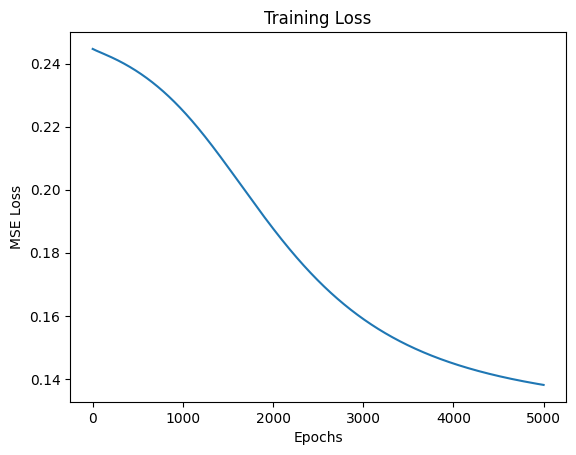

In [27]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

In [23]:
y_probs = mlp.forward(X)
y_pred = mlp.predict(X)

In [28]:
acc, prec, rec, f1 = evaluate(y, y_pred)
print(f"Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")

Accuracy=0.750, Precision=0.667, Recall=1.000, F1=0.800


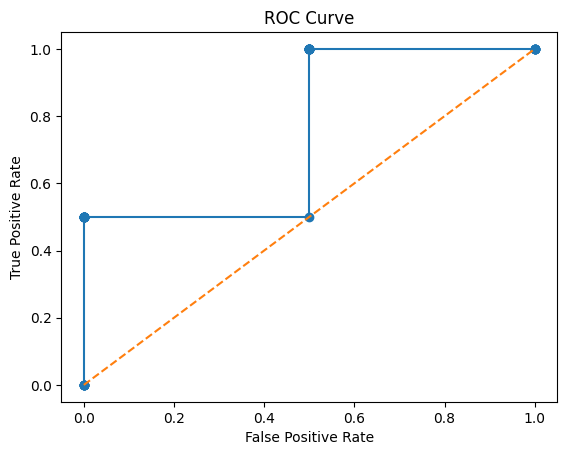

In [29]:
plot_roc(y, y_probs)